# Лабораторна робота 1

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """2 1 2 3 1 1 0 2 2 4 3 3 0 3 0 3 2 3 1 2
       2 3 0 2 3 0 2 3 3 4 4 1 4 0 0 1 2 4 4 3
       0 0 0 2 2 3 2 1 0 0 0 3 1 0 1 2 1 2 2 4
       3 2 0 0 1 0 3 0 0 3 1 3 4 2 3 3 2 0 4 
    """
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([2, 1, 2, 3, 1, 1, 0, 2, 2, 4, 3, 3, 0, 3, 0, 3, 2, 3, 1, 2, 2, 3, 0,
       2, 3, 0, 2, 3, 3, 4, 4, 1, 4, 0, 0, 1, 2, 4, 4, 3, 0, 0, 0, 2, 2, 3,
       2, 1, 0, 0, 0, 3, 1, 0, 1, 2, 1, 2, 2, 4, 3, 2, 0, 0, 1, 0, 3, 0, 0,
       3, 1, 3, 4, 2, 3, 3, 2, 0, 4])

Сумма генеральної сукупності

In [2]:
an.sum()

143

In [3]:
sum(a)

143

1) Запишемо варіаційний ряд

абсолютні частоти

In [4]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4]
[20, 12, 19, 19, 9]


In [5]:
hist, bin_edges = np.histogram(an)
print(np.unique(an))
print(hist)

[0 1 2 3 4]
[20  0 12  0  0 19  0 19  0  9]


In [6]:
ls = []
print(list(set(an)))
for j in list(set(an)):
    ls.append(np.count_nonzero(an == j))
print(ls)

[0, 1, 2, 3, 4]
[20, 12, 19, 19, 9]


In [7]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(an))}
print(freq)
print(list(freq.keys()))
print(list(freq.values()))

{0: 20, 1: 12, 2: 19, 3: 19, 4: 9}
[0, 1, 2, 3, 4]
[20, 12, 19, 19, 9]


2) Обчислимо моду

In [8]:
from statistics import mode
mode(an)

0

In [9]:
repeticiones = 0
for i in a:
    apariciones = a.count(i)
    if apariciones > repeticiones:
        repeticiones = apariciones

modas = []
for i in a:
    apariciones = a.count(i)
    if apariciones == repeticiones and i not in modas:
        modas.append(i)

print(modas)

[0]


In [10]:
counts = np.bincount(an)
print(np.argmax(counts))

0


Медіана

In [11]:
from statistics import median
print(np.median(an))
print(median(an))

2.0
2


Варіаційний ряд відносних частот

In [12]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4]
[20, 12, 19, 19, 9]
[0.253, 0.152, 0.241, 0.241, 0.114]


In [13]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(i / len(a))
print(np.array(l_rel))

[0, 1, 2, 3, 4]
[20, 12, 19, 19, 9]
[ 0.25316456  0.15189873  0.24050633  0.24050633  0.11392405]


Гістограма та полігон абсолютних частот

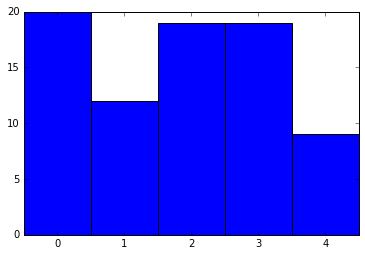

In [14]:
import matplotlib.pyplot as plt
width = 1
plt.bar(list(counter), l_values, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

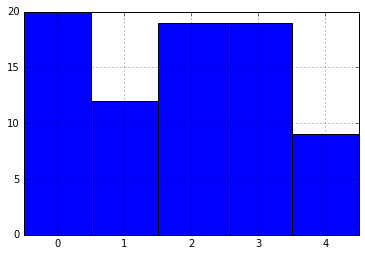

In [15]:
from collections import Counter
labels, values = zip(*Counter(a).items())
indexes = np.arange(len(labels))
width = 1
plt.grid(True)
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

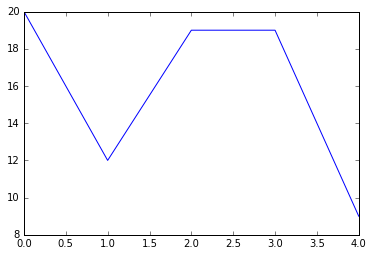

In [16]:
plt.plot(list(counter.keys()), values)
plt.show()

In [17]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
iplot([{"x": list(counter), "y": l_values}])

Гістограма та полігон відносних частот

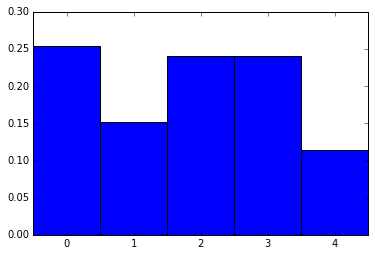

In [18]:
plt.bar(list(counter), l_rel, width)
plt.xticks(np.arange(len(l_keys)) + width * 0.5, l_keys)
plt.show()

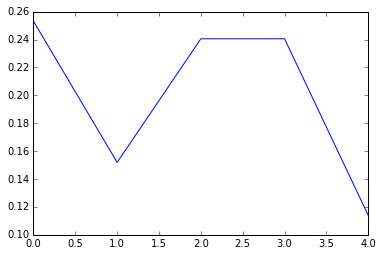

In [19]:
plt.plot(list(counter.keys()), l_rel)
plt.show()

In [20]:
init_notebook_mode(connected=True)
iplot([{"x": list(counter.keys()), "y": l_rel}])

4.1) Вибіркове середнє є незміщеною оцінкою генерального середнього і обчислюються за формулою.
Sample mean and covariance

In [21]:
from statistics import mean
print(mean(a))
print(np.mean(an))

1.8101265822784811
1.81012658228


4.2) Знайдемо незміщену оцінку генеральної дисперсії та середнього квадратичного відхилення:

sample variance

In [22]:
from statistics import variance
print(variance((a)))
print(np.cov(an))

1.8481012658227849
1.8481012658227849


Знайдемо середнє відхилення.


mean absolute deviation MAD

In [23]:
n = float(len(an))
mean = sum(an) / n
diff = [abs(x - mean) for x in an]
sum(diff) / n

1.1626341932382627

sqrt(Db)

In [24]:
from statistics import pvariance
from math import sqrt
print(sqrt(pvariance((a))))
print(sqrt(np.var(an)))

1.3508173743750989
1.3508173743750989


Знайдемо коефіцієнт варіації V 

Statistical dispersion

In [25]:
print((sqrt(np.var(an)) / np.mean(an)) )

0.746255752277


Накопичені частоти сортовані

In [26]:
ls = []
print(l_rel)
for i in range(len(l_rel)):
    ls.append(sum(l_rel[i:len(l_rel)]))
ls.reverse()

[0.25316455696202533, 0.1518987341772152, 0.24050632911392406, 0.24050632911392406, 0.11392405063291139]


Накопичені частоти

In [27]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.253,  0.405,  0.646,  0.886,  1.   ])

Складемо другу статистичну таблицю

In [28]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': list(counter.values()),
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,20,0,0.253,0.253
1,12,1,0.152,0.405
2,19,2,0.241,0.646
3,19,3,0.241,0.886
4,9,4,0.114,1.000
